In [1]:
import numpy as np
import pylab as plt

In [2]:
def evaluate_spheroidal(nu):
    """Function to compute spheroidal
        Based on libreSpheroidal function in CASA
        https://github.com/radio-astro/casa/blob/4ebd5b1508a5d31b74e7b5f6b89313368d30b9ef/code/synthesis/TransformMachines/Utils.cc#L776"""
    P = np.array(
        [[8.203343e-2, -3.644705e-1, 6.278660e-1, -5.335581e-1, 2.312756e-1],
         [4.028559e-3, -3.697768e-2, 1.021332e-1, -1.201436e-1, 6.412774e-2]])
    Q = np.array([[1.0000000e0, 8.212018e-1, 2.078043e-1],
                     [1.0000000e0, 9.599102e-1, 2.918724e-1]])

    part = 0
    end = 0.0

    if (nu >= 0.0 and nu < 0.75):
        part = 0
        end = 0.75
    elif (nu >= 0.75 and nu <= 1.00):
        part = 1
        end = 1.00
    else:
        return 0.0

    nusq = nu * nu
    delnusq = nusq - end * end
    delnusqPow = delnusq
    top = P[part][0]
    for k in range(1, 5):
        top += P[part][k] * delnusqPow
        delnusqPow *= delnusq

    bot = Q[part][0]
    delnusqPow = delnusq
    for k in range(1, 3):
        bot += Q[part][k] * delnusqPow
        delnusqPow *= delnusq

    if bot == 0:
        result = 0
    else:
        result = (1.0 - nusq) * (top / bot)
    return result


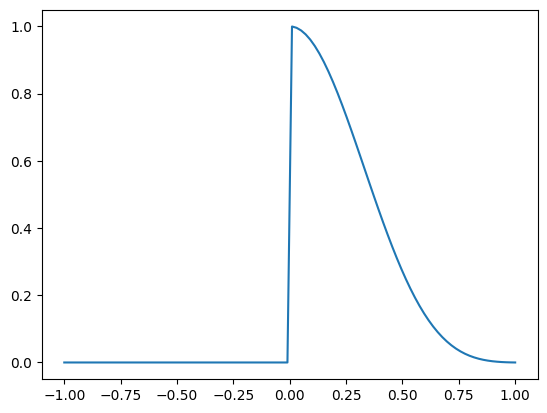

In [3]:
x = np.linspace(-1., 1., 100)
y = [evaluate_spheroidal(e) for e in x]
plt.plot(x,y)
plt.show()